## Импорты

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
from scipy.optimize import curve_fit
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.tsa.seasonal import seasonal_decompose

### Загрузка данных из CSV-файла

In [38]:
data = pd.read_csv('./л.р.2.csv', sep=';', header=0, encoding='utf-8')

#### Построение временного ряда

In [39]:
print(data.columns)

Index(['year', 'month', 't', '��� 1', '��� 2', '��� 3', '��� 4', '��� 5',
       '��� 6', '��� 7', '��� 8', '��� 9', '��� 10', '��� 11', '��� 12',
       '��� 13', '��� 14', '��� 15', '��� 16', '��� 17', '��� 18', '��� 19',
       '��� 20', '��� 21', 'num 22', '��� 23', '��� 24', '��� 25', '��� 26',
       '��� 27', '��� 28', '��� 29', '��� 30', '��� 31', '��� 32', '��� 33',
       '��� 34', '��� 35', '��� 36', '��� 37', '��� 38', '��� 39', '��� 40',
       '��� 41', '��� 42', '��� 43', '��� 44', '��� 45', '��� 46', '��� 47',
       '��� 48'],
      dtype='object')


#### Создание временного ряда для 22ого варианта и Создание индекса из столбцов 'ГОД' и 'МЕСЯЦ'

In [40]:
tsData = pd.Series(data['num 22'])
tsData.index = pd.to_datetime(data[['year', 'month']].assign(DAY=1))


##### Построение графика временного ряда

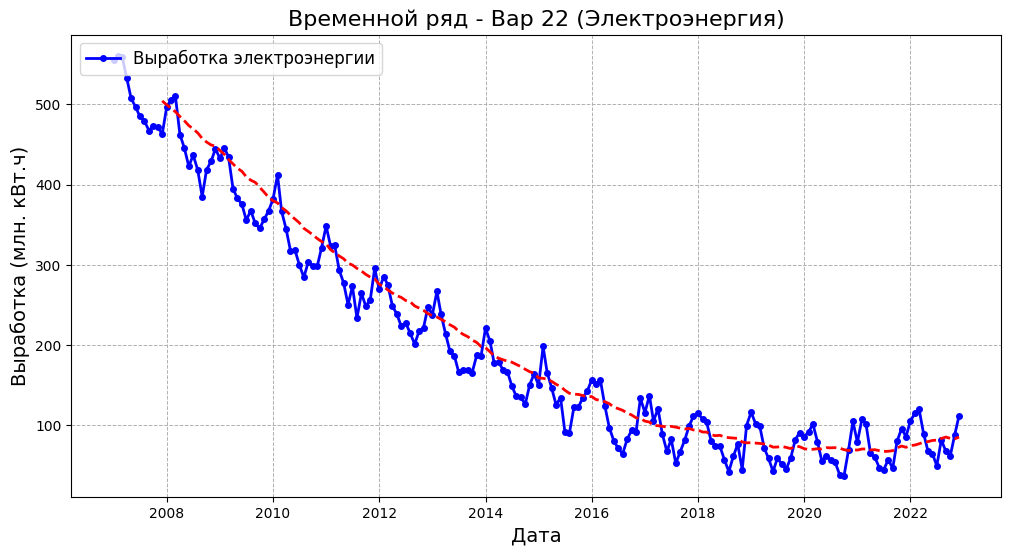

In [41]:

plt.figure(figsize=(12, 6))

plt.plot(tsData, label='Исходные данные', color='blue', linestyle='-', linewidth=2, marker='o', markersize=4)

plt.title('Временной ряд - Вар 22 (Электроэнергия)', fontsize=16)
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Выработка (млн. кВт.ч)', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.legend(['Выработка электроэнергии'], loc='upper left', fontsize=12)

rolling_mean = tsData.rolling(window=12).mean()
plt.plot(rolling_mean, color='red', linestyle='--', linewidth=2, label='Скользящее среднее (12 мес.)')
plt.show()

# метод наименьших кв
# гауса ньютона


##### 2.2 Декомпозиция временного ряда аддитивная модель на трендовую, сезонную 

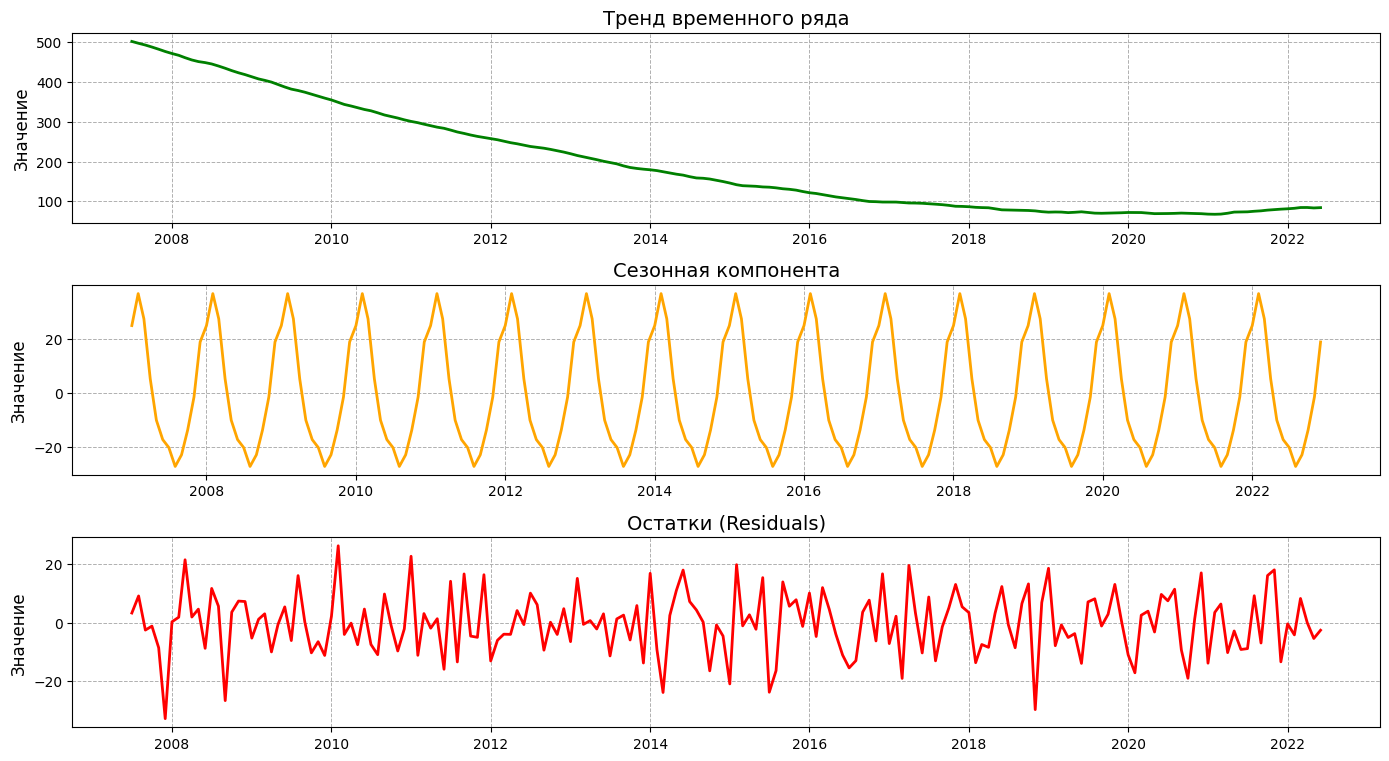

In [42]:

decomposition = seasonal_decompose(tsData, model='additive')


plt.figure(figsize=(14, 10))

plt.subplot(4, 1, 1)
plt.plot(decomposition.trend, label='Тренд', color='green', linestyle='-', linewidth=2)
plt.title('Тренд временного ряда', fontsize=14)
plt.ylabel('Значение', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.7)


plt.subplot(4, 1, 2)
plt.plot(decomposition.seasonal, label='Сезонность', color='orange', linestyle='-', linewidth=2)
plt.title('Сезонная компонента', fontsize=14)
plt.ylabel('Значение', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.7)


plt.subplot(4, 1, 3)
plt.plot(decomposition.resid, label='Остатки', color='red', linestyle='-', linewidth=2)
plt.title('Остатки (Residuals)', fontsize=14)
plt.ylabel('Значение', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.7)


plt.tight_layout()
plt.show()

### Выводы по графику декомпозиции временного ряда

1. **Тренд**
   - Наблюдается **постепенный спад** уровней выработки электроэнергии с течением времени.
   - Тенденция имеет **монотонный характер**, что указывает на устойчивое снижение.
   - Отсутствие вертикальных или горизонтальных асимптот: тренд плавно снижается, без точек стабилизации.
   - **Тип тренда**: **нелинейный**, поскольку снижение начинается резко, но замедляется ближе к 2020 году.

2. **Сезонная составляющая**
   - Наблюдается чёткая **периодичность**: колебания происходят ежегодно.
   - **Амплитуда** колебаний остаётся стабильной в течение всего рассматриваемого периода.
   - Пики сезонных колебаний происходят в одно и то же время каждый год, что говорит о **стабильной сезонности**.

3. **Остатки (шум)**
   - Остатки имеют случайный характер и не содержат очевидных трендов.
   - Уровень шума относительно постоянен, что подтверждает отсутствие изменений в уровне случайных колебаний.

### Общие выводы
- Временной ряд состоит из значимого **тренда на спад**, выраженной **сезонности** с регулярной периодичностью и стабильной амплитудой, а также **случайного шума**. 
- Ряд подходит для анализа и прогнозирования, учитывая его трендовую и сезонную структуры.


##### 2.3 Выполните исследование и модельное описание временного ряда на 
основе метода последовательной идентификации

##### 2.3.1 Идентификация тренда

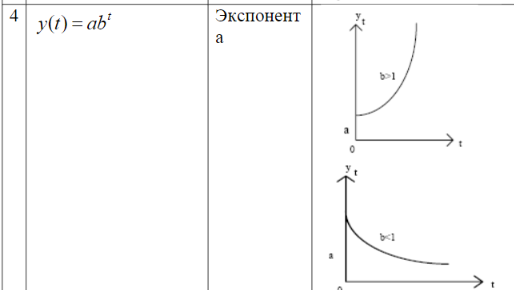
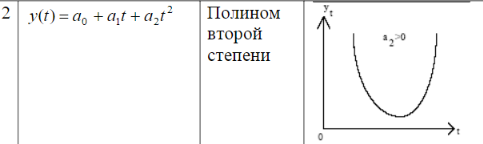

Параметры экспоненциальной модели: a = 520.0024, b = -0.0134
Параметры экспоненциальной модели: a=520.0023615759753, b=-0.013431162220574649


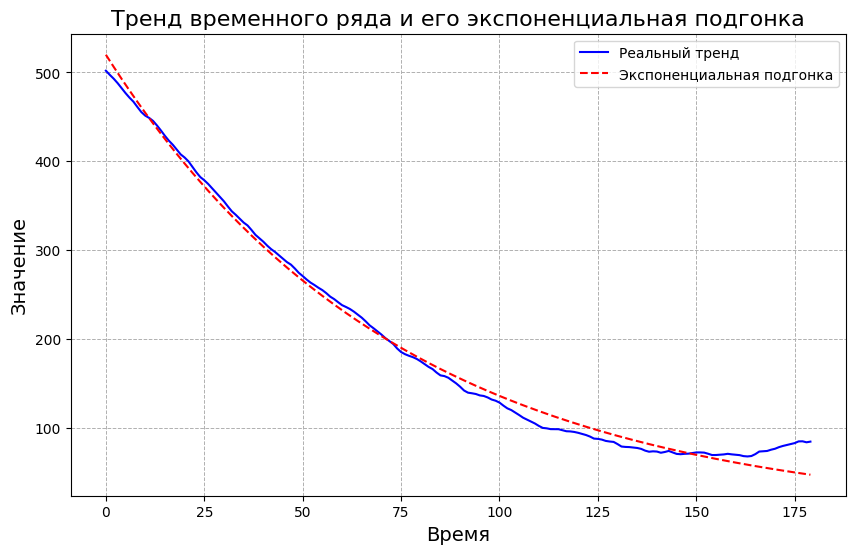

In [43]:
# trend = decomposition.trend.dropna()  # Убираем пропуски, если есть
# t = np.arange(len(trend))  # Временные точки

# # Определение экспоненциальной функции
# def exp_model(t, a, b):
#     return a * np.exp(b * t)

# # Начальные параметры
# initial_params = [0.1, 0.1]

# # Подгонка модели к тренду
# params, covariance = curve_fit(exp_model, t, trend, p0=initial_params)

# # Прогнозирование по экспоненциальной модели
# trend_fit = exp_model(t, *params)

# Определение экспоненциальной модели
def exp_model(t, a, b):
    return a * np.exp(b * t)

# Получение трендовой составляющей из декомпозиции временного ряда
trend = decomposition.trend.dropna()  # Убираем пропуски
t = np.arange(len(trend))  # Время (индексы)

# Подгонка экспоненциальной модели к трендовой составляющей
initial_params = [1, 0.01]  # Начальные значения для a и b
params, covariance = curve_fit(exp_model, t, trend, p0=initial_params)

# Полученные параметры
a, b = params
print(f"Параметры экспоненциальной модели: a = {a:.4f}, b = {b:.4f}")

# Прогноз экспоненциальной модели
exp_fit = exp_model(t, a, b)
#######################################

# Вывод параметров
print(f"Параметры экспоненциальной модели: a={params[0]}, b={params[1]}")

plt.figure(figsize=(10, 6))

# График реального тренда
plt.plot(t, trend, color='blue', label='Реальный тренд')

# График подогнанного экспоненциального тренда
plt.plot(t, trend_fit, color='red', linestyle='--', label='Экспоненциальная подгонка')

plt.title('Тренд временного ряда и его экспоненциальная подгонка', fontsize=16)
plt.xlabel('Время', fontsize=14)
plt.ylabel('Значение', fontsize=14)
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.show()



Коэффициенты полинома второй степени: [ 1.81556187e-02 -5.63176890e+00  5.07346033e+02]


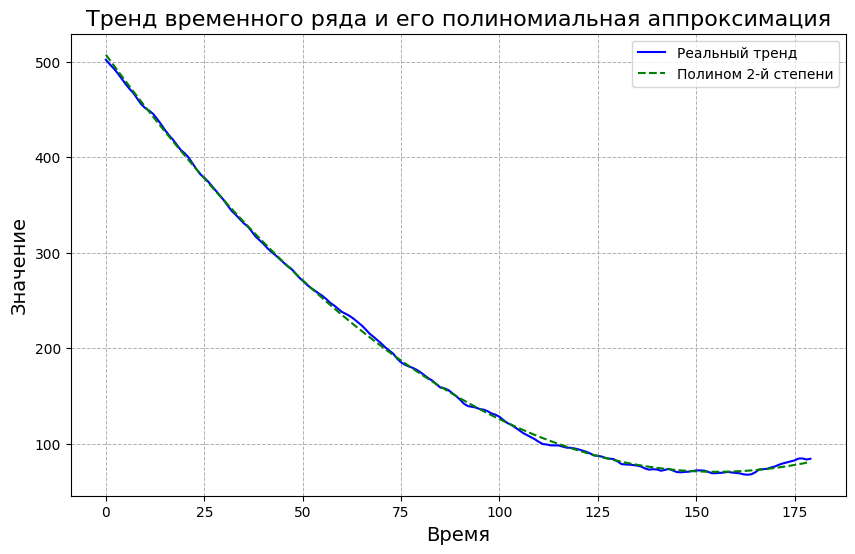

In [44]:

t = np.arange(len(trend))  # Временные точки

# Полиномиальная аппроксимация 2-го порядка
poly_params = np.polyfit(t, trend, 2)
poly_fit = np.polyval(poly_params, t)

# Вывод параметров полинома
print(f"Коэффициенты полинома второй степени: {poly_params}")

plt.figure(figsize=(10, 6))

# График реального тренда
plt.plot(t, trend, color='blue', label='Реальный тренд')

# График полиномиальной аппроксимации 2-го порядка
plt.plot(t, poly_fit, color='green', linestyle='--', label='Полином 2-й степени')

plt.title('Тренд временного ряда и его полиномиальная аппроксимация', fontsize=16)
plt.xlabel('Время', fontsize=14)
plt.ylabel('Значение', fontsize=14)
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.show()

##### Расчет какой то ошибки

In [45]:
# Функция для вычисления всех метрик
def calculate_metrics(y_true, y_pred):
    residuals = y_true - y_pred
    min_error = np.min(residuals)
    max_error = np.max(residuals)
    mean_error = np.mean(residuals)
    std_error = np.std(residuals)
    mae = mean_absolute_error(y_true, y_pred)
    mpe = np.mean((residuals / y_true) * 100)
    mape = np.mean(np.abs(residuals / y_true) * 100)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    
    metrics = {
        'Min error': min_error,
        'Max error': max_error,
        'Mean error': mean_error,
        'Std. dev.': std_error,
        'Mean absolute error': mae,
        'Mean percentage error': mpe,
        'Mean absolute percentage error': mape,
        'Root mean squared error': rmse,
        'R²': r2
    }
    
    return metrics

In [46]:
exp_metrics = calculate_metrics(trend, exp_fit)

# Выводим результаты для экспоненциальной модели
print("\nМетрики для экспоненциальной модели:")
for metric, value in exp_metrics.items():
    print(f"{metric}: {value:.4f}")

# Вычисляем метрики для полиномиальной модели
poly_metrics = calculate_metrics(trend, poly_fit)

# Выводим результаты для полиномиальной модели
print("\nМетрики для полиномиальной модели:")
for metric, value in poly_metrics.items():
    print(f"{metric}: {value:.4f}")



Метрики для экспоненциальной модели:
Min error: -17.9824
Max error: 37.2855
Mean error: 0.5162
Std. dev.: 11.1354
Mean absolute error: 8.8195
Mean percentage error: 0.6532
Mean absolute percentage error: 7.8269
Root mean squared error: 11.1474
R²: 0.9928

Метрики для полиномиальной модели:
Min error: -6.2216
Max error: 6.0878
Mean error: 0.0000
Std. dev.: 2.4199
Mean absolute error: 1.9191
Mean percentage error: -0.1602
Mean absolute percentage error: 1.4531
Root mean squared error: 2.4199
R²: 0.9997


##### 2.3.3 Автокорреляционная и частная автокорреляционная функции

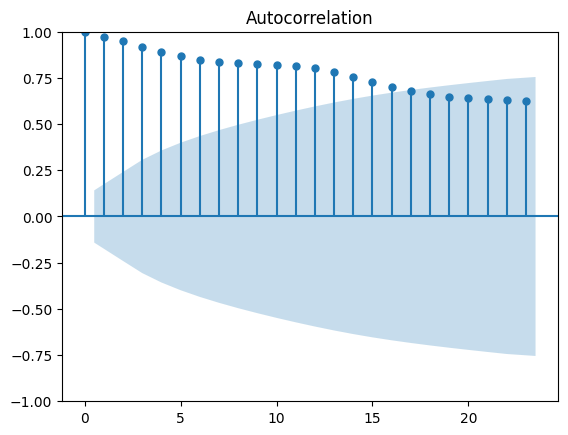

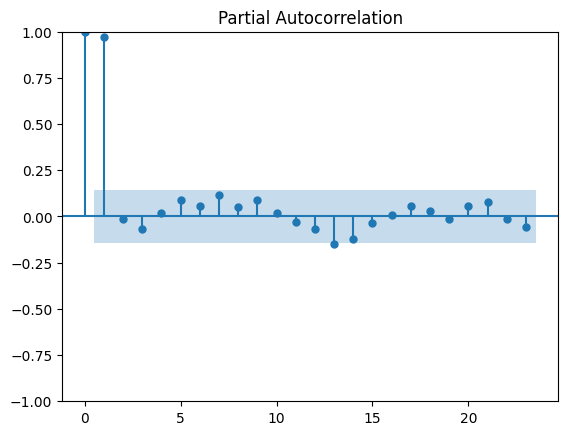

In [47]:
plot_acf(tsData)
plot_pacf(tsData)
plt.show()

<Figure size 1200x600 with 0 Axes>

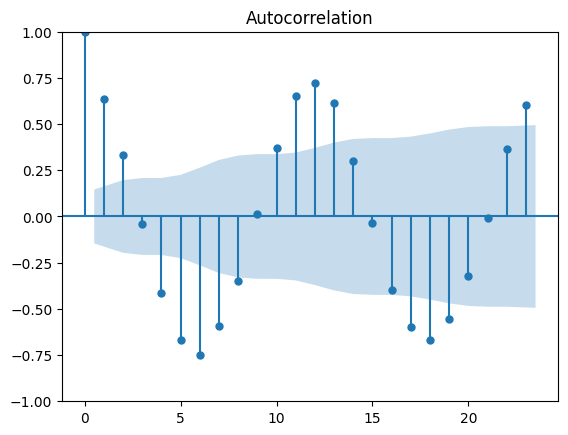

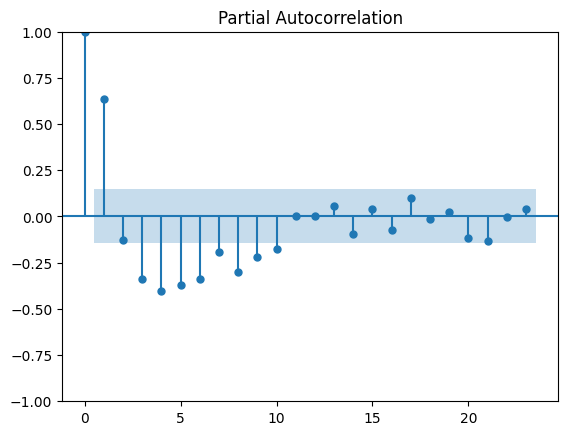

In [48]:
# Декомпозиция временного ряда (аддитивная модель)
decomposition = seasonal_decompose(tsData, model='additive')

# Трендовая составляющая
trend = decomposition.trend.dropna()

# Сезонная составляющая
seasonal = decomposition.seasonal.dropna()

# Остатки (шум)
residual = decomposition.resid.dropna()

# Оставляем ряд без тренда (вычитаем тренд)
detrended = tsData - trend
detrended = detrended.dropna()  # Убираем пропуски

# ACF и PACF для ряда без тренда
plt.figure(figsize=(12, 6))
plot_acf(detrended, lags=23)
plot_pacf(detrended, lags=23)
plt.show()

<Figure size 1200x600 with 0 Axes>

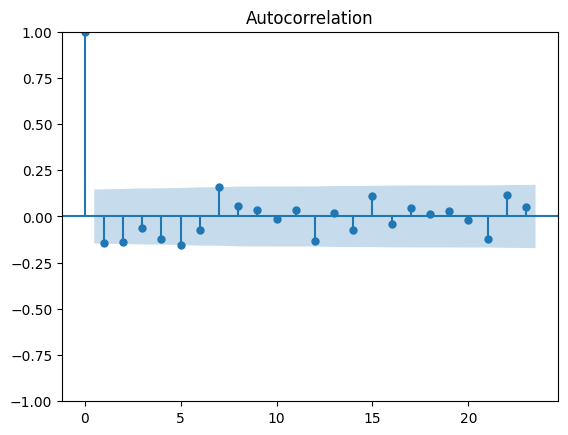

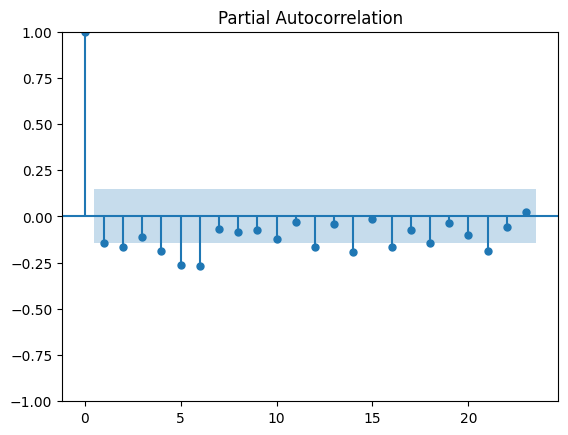

In [49]:
# Оставляем ряд без тренда (вычитаем тренд)
detrended = tsData - trend - seasonal
detrended = detrended.dropna()  # Убираем пропуски

# ACF и PACF для ряда без тренда
plt.figure(figsize=(12, 6))
plot_acf(detrended, lags=23)
plot_pacf(detrended, lags=23)
plt.show()

##### Прогноз

C:\Users\FV4005_Stage_II\AppData\Local\Temp\ipykernel_18412\544252169.py:46: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(tsData_clean.index[-1], periods=4, freq='M')[1:]  # 3 шага вперед (месяцы)


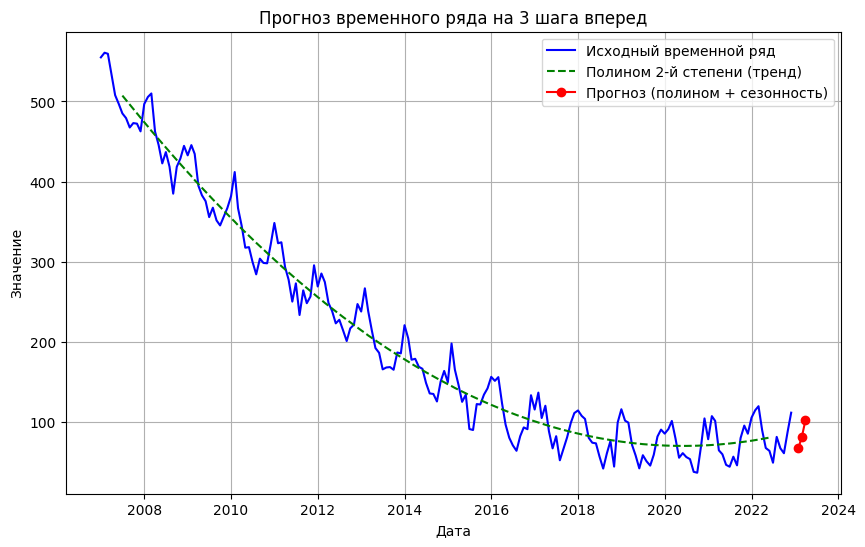

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Очистка данных от пропусков
tsData_clean = tsData.dropna()

# Декомпозиция временного ряда
decomposition = seasonal_decompose(tsData_clean, model='additive')

# Получение трендовой, сезонной и шумовой составляющих
trend = decomposition.trend.dropna()      # Тренд
seasonal = decomposition.seasonal.dropna()  # Убираем пропуски в сезонности
residual = decomposition.resid.dropna()   # Остатки (шум)

# Убедимся, что размеры данных совпадают
trend_len = len(trend)

# Подгонка полинома 2-й степени к тренду
t = np.arange(trend_len)  # Временные точки (индексы)
poly_params = np.polyfit(t, trend, 2)     # Подгонка полинома второй степени
poly_fit = np.polyval(poly_params, t)     # Значения полинома на существующем временном ряде

# Продление временного ряда на 3 шага вперед
t_future = np.arange(trend_len, trend_len + 3)  # Временные точки для прогноза
poly_future = np.polyval(poly_params, t_future)   # Прогноз тренда с помощью полинома

# Используем последние три значения сезонной составляющей для прогноза
season_cycle = len(seasonal)  # Длина одного полного цикла сезонности
season_future = seasonal[-season_cycle:][-3:].values  # Последние 3 значения сезонности для прогноза

# Общий прогноз (полином + сезонность)
forecast = poly_future + season_future

# Визуализация исходного временного ряда
plt.figure(figsize=(10, 6))

# Исходный временной ряд
plt.plot(tsData_clean.index, tsData_clean, label='Исходный временной ряд', color='blue')

# Визуализация подгонки полинома на историческом тренде
plt.plot(trend.index, poly_fit, label='Полином 2-й степени (тренд)', color='green', linestyle='--')

# Визуализация прогноза
future_dates = pd.date_range(tsData_clean.index[-1], periods=4, freq='M')[1:]  # 3 шага вперед (месяцы)
plt.plot(future_dates, forecast, label='Прогноз (полином + сезонность)', color='red', marker='o')

# Настройки графика
plt.title('Прогноз временного ряда на 3 шага вперед')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.grid(True)
plt.legend()
plt.show()


# Построение модели и прогнозирование

C:\Users\FV4005_Stage_II\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\FV4005_Stage_II\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\FV4005_Stage_II\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Прогноз на январь-март 2023: 2023-01-01    106.671448
2023-02-01    113.149499
2023-03-01    111.912486
Freq: MS, Name: predicted_mean, dtype: float64


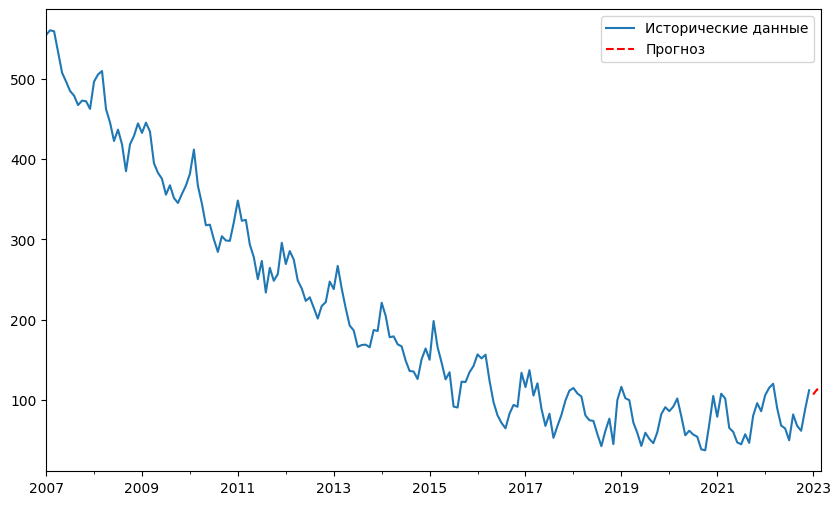

In [50]:
# 4. Обучение модели ARIMA (попробуйте разные значения p, d, q)
model = ARIMA(tsData, order=(5, 1, 1))  # Замените (p, d, q) на подходящие значения
model_fit = model.fit()

# 5. Прогнозирование на январь-март 2023 года
forecast = model_fit.forecast(steps=3)
print('Прогноз на январь-март 2023:', forecast)

# Построение прогноза на графике
tsData.plot(label='Исторические данные', figsize=(10, 6))
forecast.plot(label='Прогноз', style='r--')
plt.legend()
plt.show()